In [62]:
from pandas import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names=read_csv('./baby-names2.csv')

In [3]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [10]:
names1880=names.ix[names.year==1880]

In [11]:
len(names)

258000

In [12]:
len(names1880)

2000

In [15]:
boys=names[names.sex=='boy']

In [16]:
girls=names[names.sex=='girl']

In [18]:
len(boys)

129000

In [19]:
boys.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [20]:
boys.dtypes

year         int64
name        object
prop       float64
sex         object
soundex     object
dtype: object

In [25]:
boys.groupby('year').size().head()

year
1880    1000
1881    1000
1882    1000
1883    1000
1884    1000
dtype: int64

In [30]:
names.groupby(['year','sex']).size().head(15)

year  sex 
1880  boy     1000
      girl    1000
1881  boy     1000
      girl    1000
1882  boy     1000
      girl    1000
1883  boy     1000
      girl    1000
1884  boy     1000
      girl    1000
1885  boy     1000
      girl    1000
1886  boy     1000
      girl    1000
1887  boy     1000
dtype: int64

In [38]:
names.groupby(['year','sex']).size().ix[1880]

sex
boy     1000
girl    1000
dtype: int64

In [39]:
#get the most popular boys name in each year
boys.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [44]:
boys1882=boys[boys.year==1882]
boys1882.ix[boys1882.prop.idxmax(),['name']]

name    John
Name: 2000, dtype: object

In [60]:
def getmaxname(inpObj):
    '''gets the best name for each df passed in - the max value by the prop'''
    return inpObj.ix[inpObj.prop.idxmax()]

result=boys.groupby('year').apply(getmaxname)

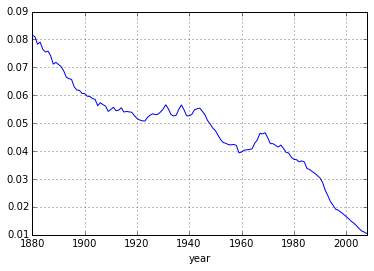

In [63]:
result.prop.plot()

In [64]:
boys[boys.name=='Travis'].head()

,year,name,prop,sex,soundex
563,1880,Travis,0.000101,boy,T612
2648,1882,Travis,0.000082,boy,T612
3672,1883,Travis,0.000080,boy,T612
4656,1884,Travis,0.000081,boy,T612
5602,1885,Travis,0.000095,boy,T612


In [67]:
#we could index by name and year which together form a unique combination
idf=boys.set_index(['name','year'])

In [69]:
idf[:5]

,,prop,sex,soundex
name,year,,,
John,1880,0.081541,boy,J500
William,1880,0.080511,boy,W450
James,1880,0.050057,boy,J520
Charles,1880,0.045167,boy,C642
George,1880,0.043292,boy,G620


In [71]:
idf[:10].ix['George']

,prop,sex,soundex
year,,,
1880,0.043292,boy,G620


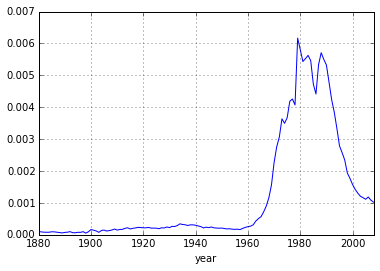

In [72]:
#plot the popularit yof travis over time
idf.ix['Travis'].prop.plot()

In [73]:
idf.ix['Travis'].head()

,prop,sex,soundex
year,,,
1880,0.000101,boy,T612
1882,0.000082,boy,T612
1883,0.000080,boy,T612
1884,0.000081,boy,T612
1885,0.000095,boy,T612


In [75]:
idf.index

MultiIndex(levels=[[u'Aaden', u'Aarav', u'Aaron', u'Ab', u'Abb', u'Abbie', u'Abbott', u'Abdiel', u'Abdul', u'Abdullah', u'Abe', u'Abel', u'Abelardo', u'Abie', u'Abner', u'Abraham', u'Abram', u'Ace', u'Acey', u'Acie', u'Acy', u'Ada', u'Adalberto', u'Adam', u'Adams', u'Adan', u'Add', u'Addie', u'Addison', u'Adelard', u'Adelbert', u'Aden', u'Adin', u'Aditya', u'Adlai', u'Admiral', u'Adolf', u'Adolfo', u'Adolph', u'Adolphus', u'Adonis', u'Adrain', u'Adrian', u'Adriel', u'Adrien', u'Adron', u'Aedan', u'Agnes', u'Agustin', u'Agustus', u'Ah', u'Ahmad', u'Ahmed', u'Aidan', u'Aiden', u'Aidyn', u'Akeem', u'Akira', u'Al', u'Alan', u'Alanzo', u'Alba', u'Albert', u'Alberto', u'Albertus', u'Albin', u'Albion', u'Alby', u'Alcee', u'Alcide', u'Alden', u'Aldo', u'Alec', u'Aleck', u'Alejandro', u'Alek', u'Alessandro', u'Alex', u'Alexande', u'Alexander', u'Alexandre', u'Alexandro', u'Alexis', u'Alexzander', u'Alf', u'Alferd', u'Alfie', u'Alfonse', u'Alfonso', u'Alfonzo', u'Alford', u'Alfred', u'Alfredo', 

In [81]:
idf.ix[('John',1880),['prop']]

prop    0.081541
Name: (John, 1880), dtype: object

In [87]:
boys.groupby('name')['prop'].median().head()

name
Aaden    0.000442
Aarav    0.000101
Aaron    0.000714
Ab       0.000042
Abb      0.000046
Name: prop, dtype: float64

In [89]:
boys.groupby('name')['prop'].describe().head(20)

name        
Aaden  count      1.000000
       mean       0.000442
       std             NaN
       min        0.000442
       25%        0.000442
       50%        0.000442
       75%        0.000442
       max        0.000442
Aarav  count      1.000000
       mean       0.000101
       std             NaN
       min        0.000101
       25%        0.000101
       50%        0.000101
       75%        0.000101
       max        0.000101
Aaron  count    129.000000
       mean       0.002266
       std        0.002545
       min        0.000351
dtype: float64

In [93]:
boys['prop'].describe().head(10)

count    129000.000000
mean          0.000916
std           0.003441
min           0.000026
25%           0.000071
50%           0.000142
75%           0.000453
max           0.081541
Name: prop, dtype: float64

In [94]:
result=boys.groupby('name')['prop'].describe()

In [95]:
result.head()

name        
Aaden  count    1.000000
       mean     0.000442
       std           NaN
       min      0.000442
       25%      0.000442
dtype: float64

In [113]:
df=boys[boys.year==1880].sort_index(by='prop',ascending=False)

In [114]:
df.prop.cumsum().tail()

936    0.930578
935    0.930620
934    0.930662
933    0.930704
999    0.930746
Name: prop, dtype: float64

In [115]:
df.prop.cumsum().searchsorted(0.5)

array([15])

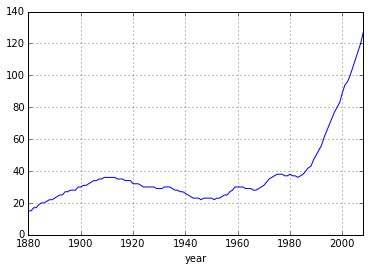

In [127]:
def calcDiversity(inpGroup,divIndex=0.5):
    '''Deiversity as defined is the total number of names covering the divIndex ratio of the population in an year'''
    #divIndex=0.5
    return inpGroup.sort_index(by='prop',ascending=False).prop.cumsum().searchsorted(divIndex)[0]
boys.groupby('year').apply(calcDiversity).plot()

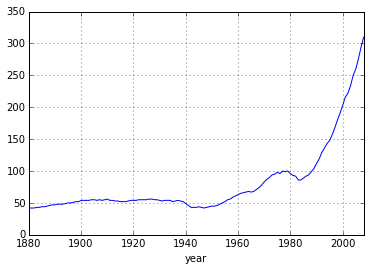

In [128]:
girls.groupby('year').apply(calcDiversity).plot()

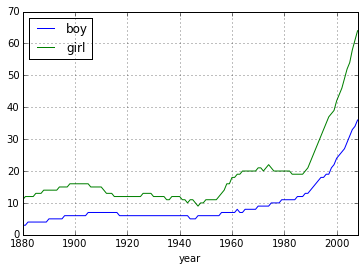

In [135]:
q=0.25
boys.groupby('year').apply(calcDiversity,divIndex=q).plot(label='boy')
girls.groupby('year').apply(calcDiversity,divIndex=q).plot(label='girl')
plt.legend(loc='best')

In [139]:
#what is the rank of my name over years
names[names.name=='John'].head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1000,1881,John,0.080975,boy,J500
2000,1882,John,0.078314,boy,J500
3000,1883,John,0.079066,boy,J500
4000,1884,John,0.076476,boy,J500


In [146]:
boys['yearwiserank']=boys.groupby('year').prop.transform(Series.rank)

/home/sunil/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [147]:
boys.head()

,year,name,prop,sex,soundex,yearwiserank
0,1880,John,0.081541,boy,J500,1000
1,1880,William,0.080511,boy,W450,999
2,1880,James,0.050057,boy,J520,998
3,1880,Charles,0.045167,boy,C642,997
4,1880,George,0.043292,boy,G620,996


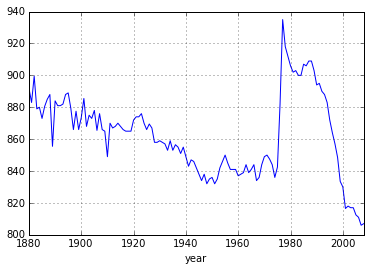

In [151]:
idf=boys.set_index(['name','year'])
idf.ix['Wesley'].yearwiserank.plot()

In [152]:
births=read_csv('./births.csv')

In [153]:
births.head()

,year,sex,births
0,1880,boy,118405
1,1881,boy,108290
2,1882,boy,122034
3,1883,boy,112487
4,1884,boy,122745


In [155]:
#lets say we want to ge the total number of johns across years
namesbirths=merge(names,births,how='inner',on=['year','sex'])

In [157]:
len(names)-len(namesbirths)

0

In [161]:
namesbirths['numbirths']=np.floor(namesbirths['births']*namesbirths['prop'])

In [162]:
namesbirths.head()

,year,name,prop,sex,soundex,births,numbirths
0,1880,John,0.081541,boy,J500,118405,9654
1,1880,William,0.080511,boy,W450,118405,9532
2,1880,James,0.050057,boy,J520,118405,5926
3,1880,Charles,0.045167,boy,C642,118405,5347
4,1880,George,0.043292,boy,G620,118405,5125


In [183]:
namesbirths.groupby(['name','sex'])['numbirths'].sum().head(20)

name      sex 
Aaden     boy        959
Aaliyah   girl     39660
Aarav     boy        219
Aaron     boy     508034
          girl      1365
Ab        boy         24
Abagail   girl      2680
Abb       boy         15
Abbey     girl     14333
Abbie     boy         10
          girl     16556
Abbigail  girl      6792
Abbott    boy          9
Abby      girl     47845
Abdiel    boy        199
Abdul     boy       2609
Abdullah  boy       2352
Abe       boy       6835
Abel      boy      30752
Abelardo  boy         68
Name: numbirths, dtype: float64

In [187]:
someseries=namesbirths[namesbirths.sex=='boy'].set_index(['year','name'])['numbirths']

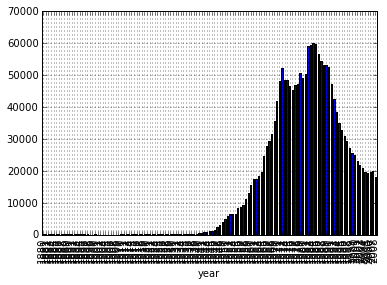

In [188]:
someseries.ix[:,'Christopher'].plot(kind='bar',rot=90)

In [196]:
res=someseries.unstack('name')

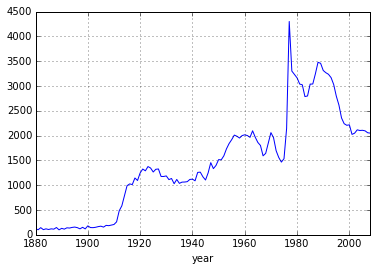

In [201]:
result = res['Wesley'].plot()